<a href="https://colab.research.google.com/github/JuannMontoya/PDI_2025_2/blob/main/Talleres/Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

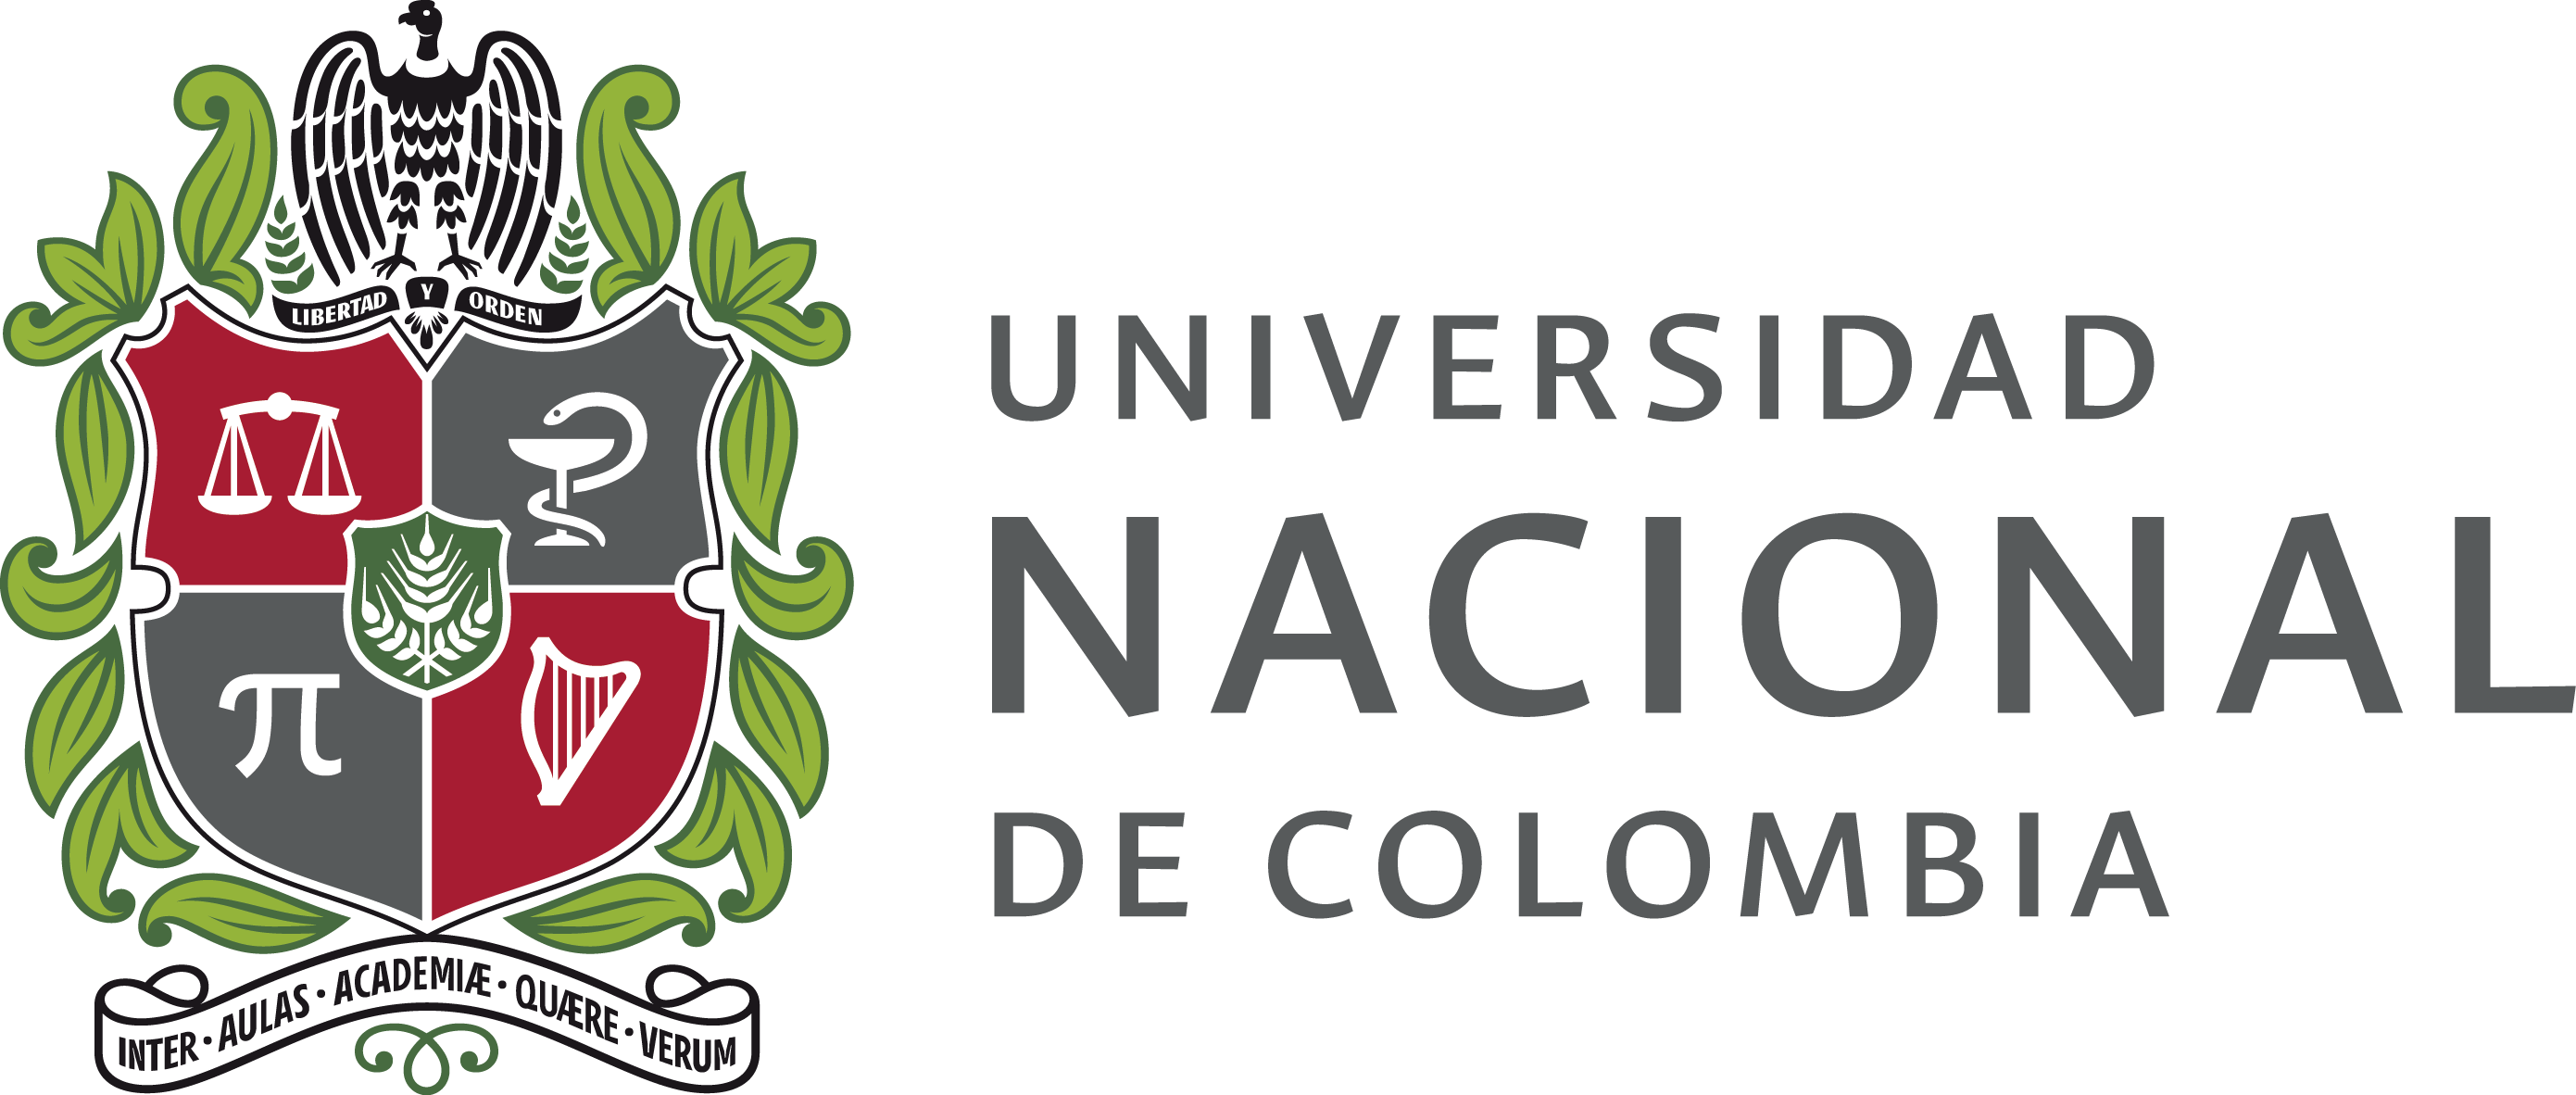
### **Universidad Nacional de Colombia sede Manizales**
#### Facultad de ingeniería y arquitectura
#### Departamento de ingeniería eléctrica, electrónica y computación
#### *Procesamiento digital de imágenes*

#### Profesor: Lucas Iturriago

## Taller 1: Transformaciones Morfológicas

### **Punto 1. Fundamentos teóricos (análisis conceptual)**

1. Define qué son las transformaciones morfológicas y explica en qué se diferencian de los filtros lineales.

2. Menciona y describe brevemente las operaciones morfológicas básicas: erosión, dilatación, apertura, cierre.

3. ¿Qué papel cumple el elemento estructurante en estas operaciones? Explica cómo su tamaño y forma afectan el resultado.


Solucion:

- 1. son operaciones aplicadas a imagenes con el objetivo de modificar, eliminar, detectar...etc estructuras dentro de una imagen
- 2. Erosión: reduce el tamaño de los objetos en la imagen.
     Dilatación: expande o hace crecer los objetos.
     Apertura: es una erosión seguida de una dilatación usando el mismo elemento estructurante.
     Cierre: es una dilatación seguida de una erosión con el mismo elemento estructurante.
- 3. Es una pequeña matrix ya sea de 5x5, 3x3 o ect que define la vecindad de la transformacion.

### **Punto 2. Implementación práctica**

Usa OpenCV para aplicar erosión y dilatación a la siguiente imagen binaria (puedes usar una forma simple, como un rectángulo blanco sobre fondo negro).
Incluye el código y una breve descripción del resultado.


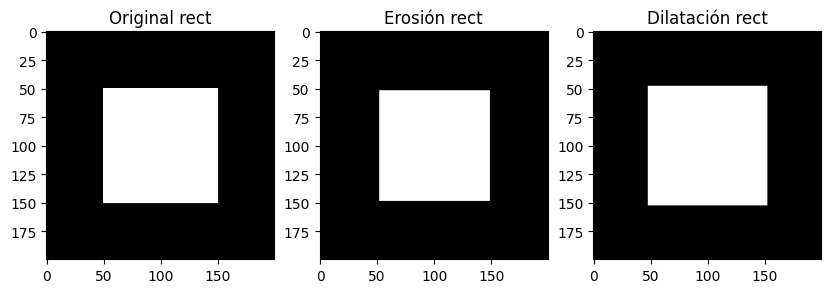

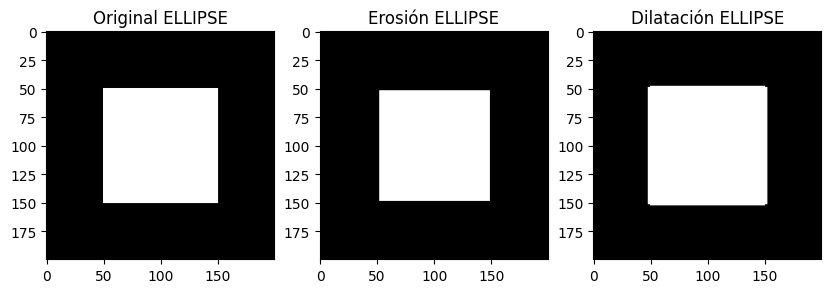

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((200, 200), dtype=np.uint8)
cv2.rectangle(img, (50, 50), (150, 150), 255, -1)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
erosion = cv2.erode(img, kernel, iterations=1)
dilation = cv2.dilate(img, kernel, iterations=1)

plt.figure(figsize=(10,3))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title('Original rect')
plt.subplot(1,3,2); plt.imshow(erosion, cmap='gray'); plt.title('Erosión rect')
plt.subplot(1,3,3); plt.imshow(dilation, cmap='gray'); plt.title('Dilatación rect')
plt.show()


img = np.zeros((200, 200), dtype=np.uint8)
cv2.rectangle(img, (50, 50), (150, 150), 255, -1)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
erosion = cv2.erode(img, kernel, iterations=1)
dilation = cv2.dilate(img, kernel, iterations=1)

plt.figure(figsize=(10,3))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title('Original ELLIPSE')
plt.subplot(1,3,2); plt.imshow(erosion, cmap='gray'); plt.title('Erosión ELLIPSE')
plt.subplot(1,3,3); plt.imshow(dilation, cmap='gray'); plt.title('Dilatación ELLIPSE')
plt.show()




**Preguntas:**
1. ¿Qué ocurre con el tamaño del objeto después de la erosión y después de la dilatación?
2. ¿Cómo cambia el resultado si usas un kernel circular (`cv2.MORPH_ELLIPSE`)?


## Solucion

- El objeto se hace más pequeño los bordes del rectángulo se encogen hacia el centro, ya que la operación elimina los píxeles del borde donde el elemento estructurante no cabe completamente dentro de la región blanca.

- El objeto se hace más grande los bordes del rectángulo se expanden hacia afuera, porque basta con que una parte del elemento estructurante toque el objeto para que el píxel central se vuelva blanco.
Cuanto más grande sea el kernel, más crecerá el objeto.

- Mantiene el mismo resultado a diferencia que la dilacion en angulo de 90 grados genero un suavizado de esquinas que posiblemente no sea deseado

### **Punto 3. Análisis de apertura y cierre**

Aplica apertura y cierre sobre una imagen con ruido (por ejemplo, ruido sal y pimienta).
Compara visualmente los resultados y explica en qué situaciones prácticas se recomienda cada operación.

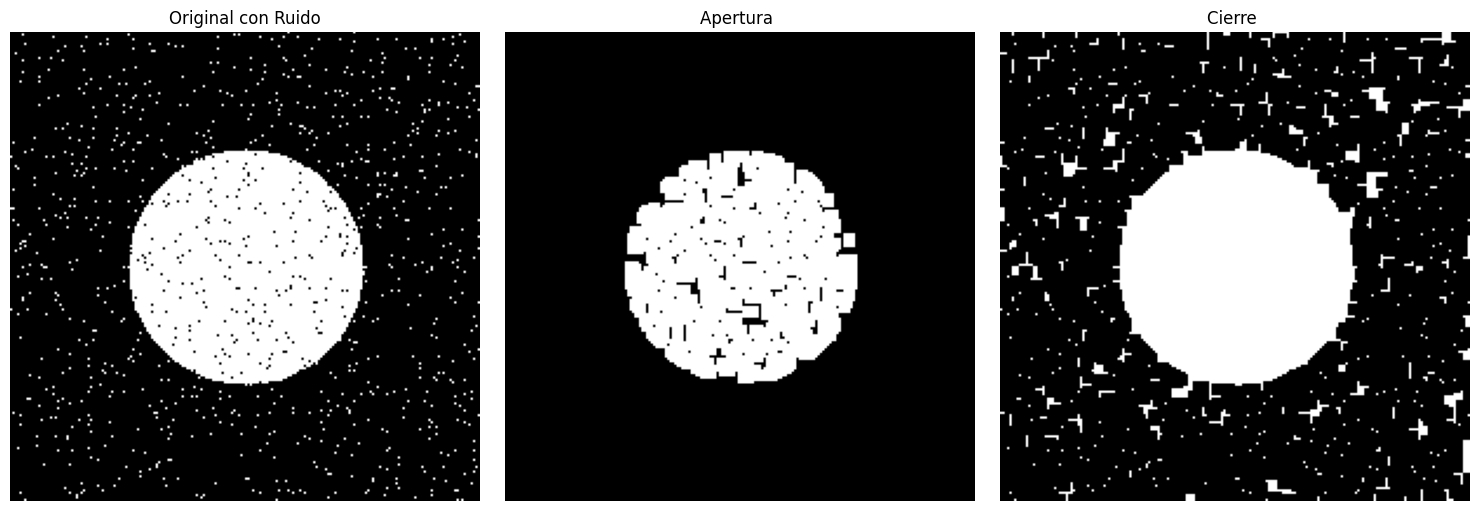

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = np.zeros((200, 200), dtype=np.uint8)
cv2.circle(img, (100, 100), 50, 255, -1)


# Sal (píxeles blancos aleatorios en el fondo negro)
noise_salt = np.random.randint(0, 200, (200, 200))
img[noise_salt < 5] = 255 # Ruido blanco

# Pimienta (píxeles negros aleatorios en el objeto blanco)
noise_pepper = np.random.randint(0, 200, (200, 200))
img[noise_pepper < 5] = 0 # Ruido negro

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

apertura = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

cierre = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original con Ruido')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(apertura, cmap='gray')
plt.title('Apertura ')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cierre, cmap='gray')
plt.title('Cierre ')
plt.axis('off')

plt.tight_layout()
plt.show()

##Descripcion

1.   La apertura elimino casi que por completo el ruido de la sal (puntos blancos en la imagen) al aplicarle la operacion y al contrario la pimienta se elimino con con el cierre
2.   La apertura es muy util en espacios negativos ya que erosion remueve los pixeles aislados y dilatacion devuelve el tama;o original

Cierre logra lo mismo pero con el ruido de pimienta en la imagen manteniendo la parte brillante de la imagen limpia


### **Punto 4. Operaciones avanzadas**

Investiga y demuestra con código las siguientes transformaciones:

- **Top-hat**
- **Black-hat**
- **Gradiente morfológico**

Explica el propósito de cada una y proporciona ejemplos visuales de cómo ayudan a resaltar bordes o estructuras finas.

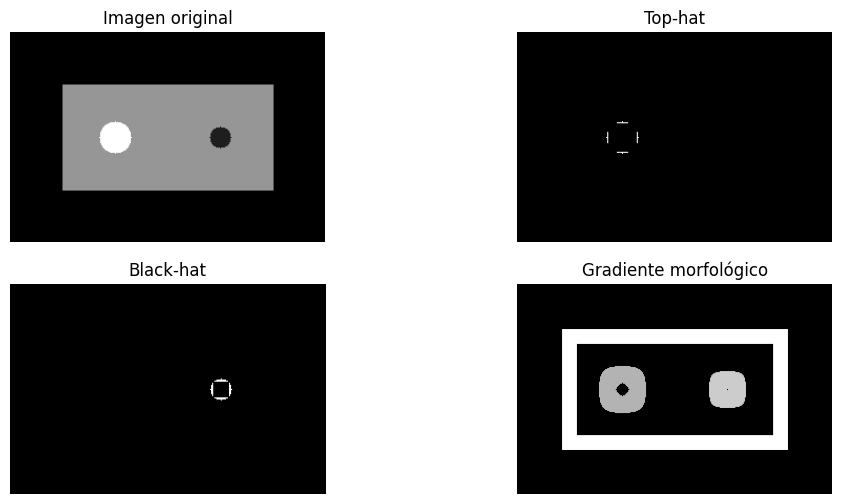

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = np.zeros((200, 300), dtype=np.uint8)
cv2.rectangle(img, (50, 50), (250, 150), 150, -1)
cv2.circle(img, (100, 100), 15, 255, -1)
cv2.circle(img, (200, 100), 10, 30, -1)


kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))


tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)


plt.figure(figsize=(12,6))
plt.subplot(2,2,1); plt.imshow(img, cmap='gray'); plt.title('Imagen original'); plt.axis('off')
plt.subplot(2,2,2); plt.imshow(tophat, cmap='gray'); plt.title('Top-hat'); plt.axis('off')
plt.subplot(2,2,3); plt.imshow(blackhat, cmap='gray'); plt.title('Black-hat'); plt.axis('off')
plt.subplot(2,2,4); plt.imshow(gradient, cmap='gray'); plt.title('Gradiente morfológico'); plt.axis('off')
plt.show()


- Tophat: Resalta las partes pequeñas y brillantes que son más claras que su entorno y muestra los detalles blancos que fueron borrados por la apertura.
- Black-hat: Resalta las partes pequeñas y oscuras que son más oscuras que su entornomuestra los detalles oscuros que fueron borrados por el cierre.
- gradient : muestra dónde cambian los tonos: los bordes.

### **Punto 5. Reflexión y aplicación**


Elabora un caso breve (una o dos imágenes) en el que combines **dos o más transformaciones morfológicas** para lograr un objetivo específico, por ejemplo:

- Limpieza de una máscara segmentada.  
- Extracción de contornos de huellas, hojas o letras.  
- Aislamiento de regiones de interés en imágenes biomédicas.

Describe:

1. Qué operaciones usaste y en qué orden.  
2. Qué resultado obtuviste.  
3. Qué limitaciones observaste.


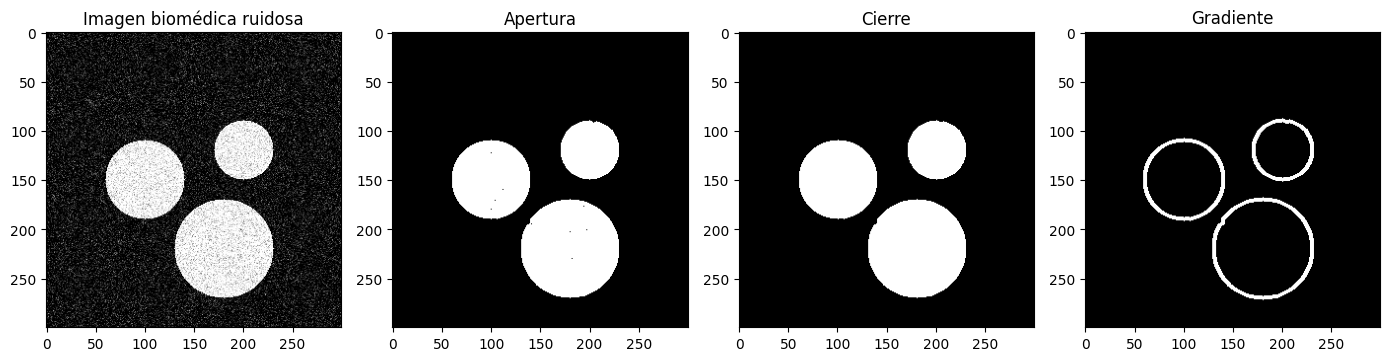

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#imagen biomédica
img = np.zeros((300, 300), dtype=np.uint8)
cv2.circle(img, (100, 150), 40, 255, -1)   # célula 1
cv2.circle(img, (200, 120), 30, 255, -1)   # célula 2
cv2.circle(img, (180, 220), 50, 255, -1)   # célula 3

#ruido gaussiano
mean, std = 0, 49
noise = np.random.normal(mean, std, img.shape).astype(np.int16)
noisy_img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)


_, binary = cv2.threshold(noisy_img, 100, 255, cv2.THRESH_BINARY)


kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)


closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)


gradient = cv2.morphologyEx(closing, cv2.MORPH_GRADIENT, kernel)


plt.figure(figsize=(14,4))
plt.subplot(1,4,1); plt.imshow(noisy_img, cmap='gray'); plt.title('Imagen biomédica ruidosa')
plt.subplot(1,4,2); plt.imshow(opening, cmap='gray'); plt.title('Apertura')
plt.subplot(1,4,3); plt.imshow(closing, cmap='gray'); plt.title('Cierre')
plt.subplot(1,4,4); plt.imshow(gradient, cmap='gray'); plt.title('Gradiente')
plt.tight_layout()
plt.show()



1. Qué operaciones usaste y en qué orden.  
- Apertura para eliminar el ruido blanco y suaviza contornos
- Cierre para rellenar huecos y discontinuidades en las células y hace que las regiones sean más sólidas y conectadas.
- Gradiente para detectar contornos
2. Qué resultado obtuviste.  
- una limpieza de ruido gaussiano de una imagen simulada de celulas, el resultado no es perfecto pero es bueno.

3. Qué limitaciones observaste.
- Si el kernel es demasiado grande, puede unir células cercanas
- No optimo cuando el ruido es muy alto